In [113]:
# Importação do grafo
from networkx import nx_agraph
from graphviz import Source

# Carregar o grafo usando NetworkX
graph = nx_agraph.read_dot('./graphs/graph2.dot')

# Converter o grafo para o formato DOT
graph_dot = nx_agraph.to_agraph(graph)

# Imprime na tela
source = Source(graph_dot.to_string())
# source
source.view()  # Abre o visualizador padrão do sistema operacional


'Source.gv.pdf'

## Busca em Largura (BFS)
Usando matriz de adjacência

In [107]:
# Converte o grafo para matriz de adjacência
from networkx import to_numpy_array
import pandas as pd
adj_matrix = to_numpy_array(graph)
print(adj_matrix)

# Imprime de forma bonita
node_names = list(graph.nodes())
df_matrix = pd.DataFrame(adj_matrix, index=node_names, columns=node_names)
df_matrix_int = df_matrix.astype(int)
df_matrix_int.style.map(lambda v: 'color: red' if v == 1 else '')



[[0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]]


,a,b,c,d,e,f,g,h,i,j
a,0,1,0,0,1,0,0,0,0,0
b,1,0,1,0,0,0,0,1,0,0
c,0,1,0,1,0,1,0,0,0,0
d,0,0,1,0,1,0,0,0,0,0
e,1,0,0,1,0,0,0,0,0,0
f,0,0,1,0,0,0,1,0,0,1
g,0,0,0,0,0,1,0,1,0,0
h,0,1,0,0,0,0,1,0,1,0
i,0,0,0,0,0,0,0,1,0,1
j,0,0,0,0,0,1,0,0,1,0


Processamento do nó a: 0.311 ms
['b', 'e']
Processamento do nó b: 0.182 ms
['e', 'c', 'h']
Processamento do nó e: 0.096 ms
['c', 'h', 'd']
Processamento do nó c: 0.086 ms
['h', 'd', 'f']
Processamento do nó h: 0.096 ms
['d', 'f', 'g', 'i']
Processamento do nó d: 0.082 ms
['f', 'g', 'i']
Processamento do nó f: 0.088 ms
['g', 'i', 'j']
Processamento do nó g: 0.080 ms
['i', 'j']
Processamento do nó i: 0.076 ms
['j']
Processamento do nó j: 0.073 ms
[]


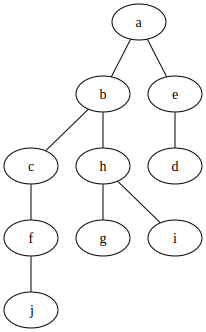

In [117]:
from typing import Dict, List
from networkx import Graph
from pandas import DataFrame
import time
def bfs(df_matrix: DataFrame, start_node: str) -> Graph:
    visited = set()
    bfs_tree = Graph()
    queue = [start_node]

    while queue:
        start_time = time.time()
        current_node = queue.pop(0)
        if current_node not in visited:
            visited.add(current_node)
            neighbors = df_matrix.columns[df_matrix.loc[current_node] == 1].tolist()
            for neighbor in neighbors:
                if neighbor not in visited:
                    if neighbor not in queue:
                        bfs_tree.add_edge(current_node, neighbor)
                        queue.append(neighbor)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Processamento do nó {current_node}: {elapsed_time * 1000:.3f} ms")
        print(queue)

    return bfs_tree


result_tree = bfs(df_matrix, "a")
result_tree_dot = nx_agraph.to_agraph(result_tree)
Source(result_tree_dot.to_string())

## Busca por profundidade (DFS) 
Usando lista de adjacência

In [73]:
# Converte o grafo para listas de adjacência
from networkx import to_dict_of_lists
adj_list = to_dict_of_lists(graph)
adj_list

{'a': ['b', 'e'],
 'b': ['a', 'c', 'h'],
 'c': ['b', 'd', 'f'],
 'd': ['c', 'e'],
 'e': ['d', 'a'],
 'f': ['c', 'g', 'j'],
 'g': ['f', 'h'],
 'h': ['b', 'g', 'i'],
 'i': ['h', 'j'],
 'j': ['i', 'f']}

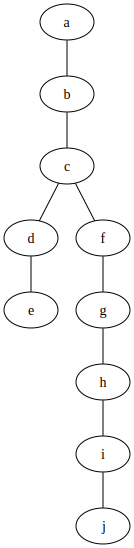

In [74]:
from typing import Dict, List
from networkx import Graph

def dfs(adj_list: Dict[str, List[str]], start_node: str) -> Graph:
    visited = set()
    dfs_tree = Graph()

    def visit(node: str):
        visited.add(node)
        for neighbor in adj_list.get(node, []):
            if neighbor not in visited:
                dfs_tree.add_edge(node, neighbor)
                visit(neighbor)

    visit(start_node)
    return dfs_tree


start_node = min(adj_list.keys())

result_tree = dfs(adj_list, start_node)
result_tree_dot = nx_agraph.to_agraph(result_tree)
Source(result_tree_dot.to_string())